# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

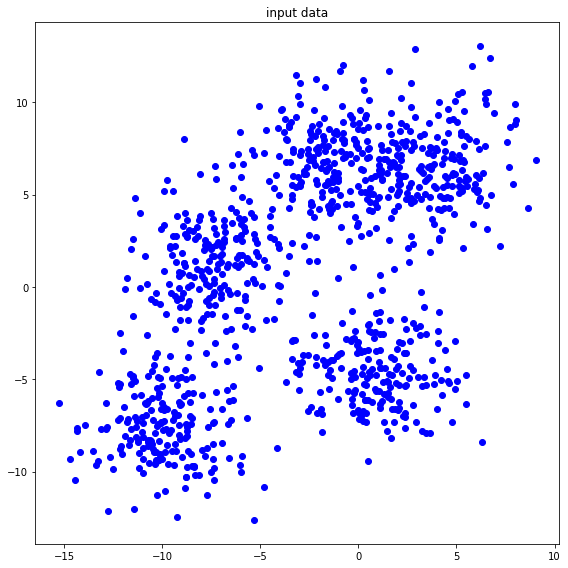

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x,y, c = 'blue')
plt.tight_layout()

plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):
    n = feature.shape[0]
    
    b = np.tile(center, (n,1))
    distance = np.sum((feature - b)**2, axis=1)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [26]:
#until now my understanding...
#among n*1 feature find value_label and compute that field 
#using feature compute centroid by avarage ...
def compute_centroid(feature, label_feature, value_label,a):
    index = np.where(label_feature==value_label)[0]
    if len(index)==0:
        print(0)
        return a
    centroid = np.zeros((1,feature.shape[1]))
    for i in range(len(index)):
        centroid = centroid + feature[index[i]]
    
    centroid = centroid / len(index) 
        
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):
    index_label_feature = np.zeros((distance.shape[0],1))
    for i in range(distance.shape[0]):
        index_label_feature[i] = distance[i].argmin()
    return index_label_feature


In [19]:
# ===================================================
# assign the number of clusters and iterations
k=10
max_iter=200
number_cluster      = k 
number_iteration    = max_iter
# ===================================================

In [58]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cluster       = np.zeros((number_cluster))
for i in range(number_cluster):
    label_cluster[i]+=i
    i+=1
feature = np.array((x,y)).T
label_feature       = np.zeros(shape=(number_data,1))
distance_cal        = np.zeros(shape=(number_cluster,number_data))

#number feature = 2 number_data = 1000
a = (x.max()-x.min())*np.random.random(number_cluster)+x.min()
b = (y.max()-y.min())*np.random.random(number_cluster)+y.min()
new_centroid = np.array((a,b)).T

"""
feature :  n×m, label_feature :  n×1, value_label :  1×1, centroid :  1×m
n  : number of data,  m  : number of features
"""

for i in range(number_iteration):
    loss=0
    centroid_iteration[i] = new_centroid
        
    for k in range(len(label_cluster)):
        distance_cal[k] = compute_distance(feature, new_centroid[k].T)
    distance = distance_cal.T
    label_feature = compute_label(distance)
    for k in range(number_data):
        idx=int(label_feature[k])
        loss+=np.sum((feature[k]-new_centroid[idx])**2)
    for k in range(len(label_cluster)):
        new_centroid[k] = compute_centroid(feature,label_feature,k,new_centroid[k])
    loss = loss/number_data
    loss_iteration[i] = loss   


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## plot the results

In [11]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
   

    plt.scatter(x,y, c = 'blue')

    plt.tight_layout()
    plt.show()

In [12]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    plt.plot(loss_iteration,'r-')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [59]:

print(centroid_iteration[0])
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    rgb=[]
    for j in range(centroid_iteration.shape[1]):
        rgb.append((np.random.rand(),np.random.rand(),np.random.rand()))

        plt.plot(centroid_iteration[:, : ,0].T[j],centroid_iteration[:, : ,1].T[j], color=rgb[j],label='cluster=%d'%j) 
   
    plt.scatter(centroid_iteration[0][:][:].T[0], centroid_iteration[0][:][:].T[1], c='blue',label='inital')
    plt.scatter(centroid_iteration[number_iteration-1][:][:].T[0], centroid_iteration[number_iteration-1][:][:].T[1], c='red', marker='s',label='final')
    plt.legend()        
   
    plt.tight_layout()
    plt.show()

[[  6.31685461  -0.23303589]
 [-11.84328897   0.89315749]
 [ -4.98998734   6.74974691]
 [ -6.59050012   4.64830629]
 [ -3.77859253   7.93492804]
 [  3.70310836  -0.85787219]
 [ -8.40785195 -10.63795699]
 [ -9.72908336 -11.2145069 ]
 [-13.9516272   12.68385992]
 [-10.91162989 -12.52091541]]


In [14]:

def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    scatter = plt.scatter(x,y,c= label_feature,cmap = cm.get_cmap('gist_rainbow',label_cluster.shape[0]))
    min_val = int(label_cluster.min())
    max_val = int(label_cluster.max())
    plt.colorbar(scatter,ticks = np.linspace(min_val,max_val,max_val-min_val+1),label='cluster')
    plt.clim(-0.5,max_val+0.5)
    plt.tight_layout()
    plt.show()

***

# results

***

1. plot the input data

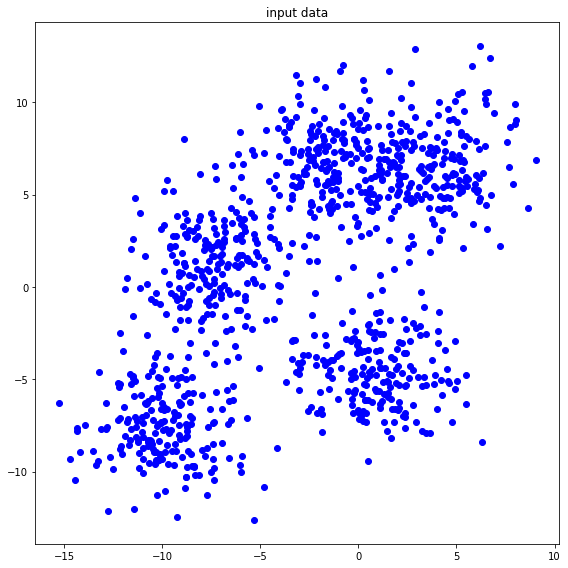

In [15]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

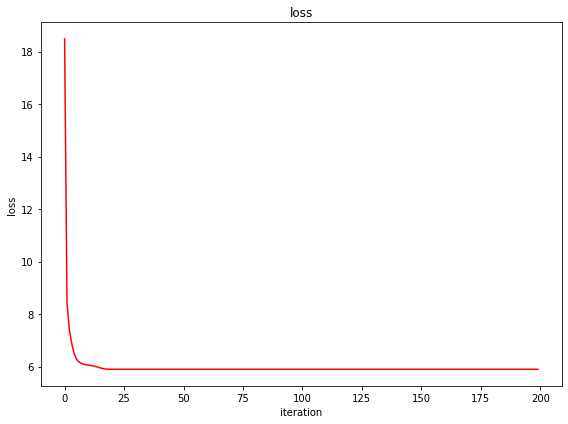

In [39]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

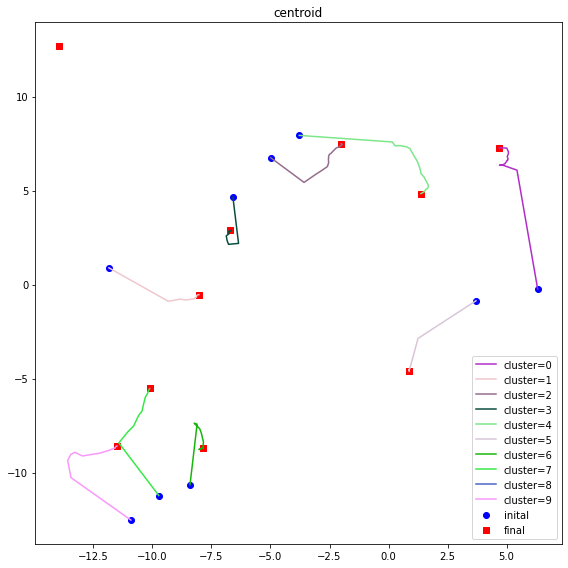

In [60]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

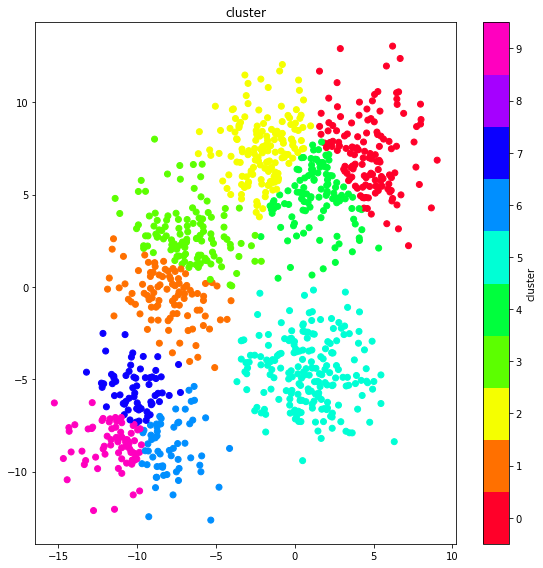

In [61]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

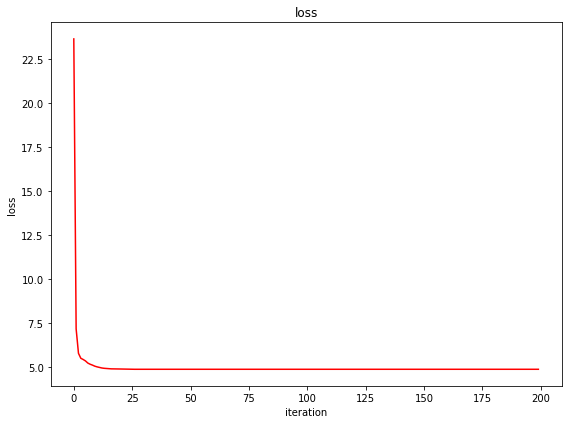

In [21]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

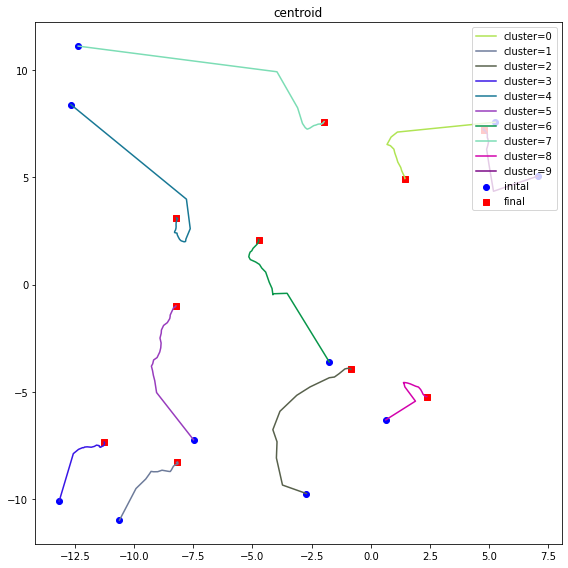

In [22]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

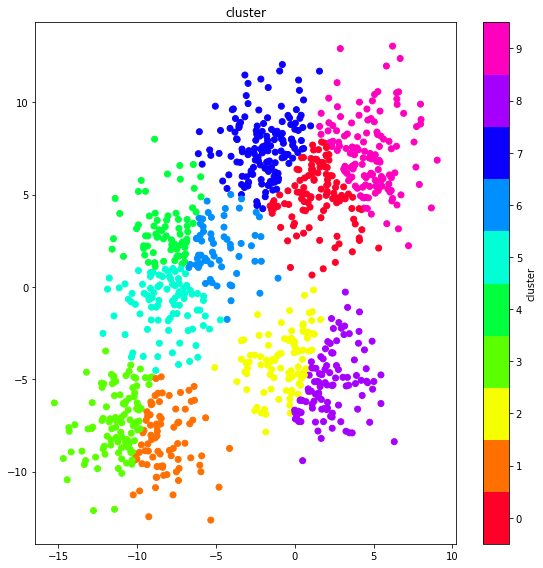

In [23]:
plot_cluster(feature, label_feature, label_cluster)

***